In [97]:
%matplotlib inline

from IPython.display import display as d
from IPython.display import Image
# !pip install wordcloud
from wordcloud import WordCloud

import pandas as pd
import plotly.express as px
import plotly.io as pio
import re
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
pio.renderers.default = "notebook_connected"

import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)

def save_fig(ax, title, pdfname):
    ax.set_title(title)
    ax.get_figure().savefig(pdfname, bbox_inches="tight", dpi=300)

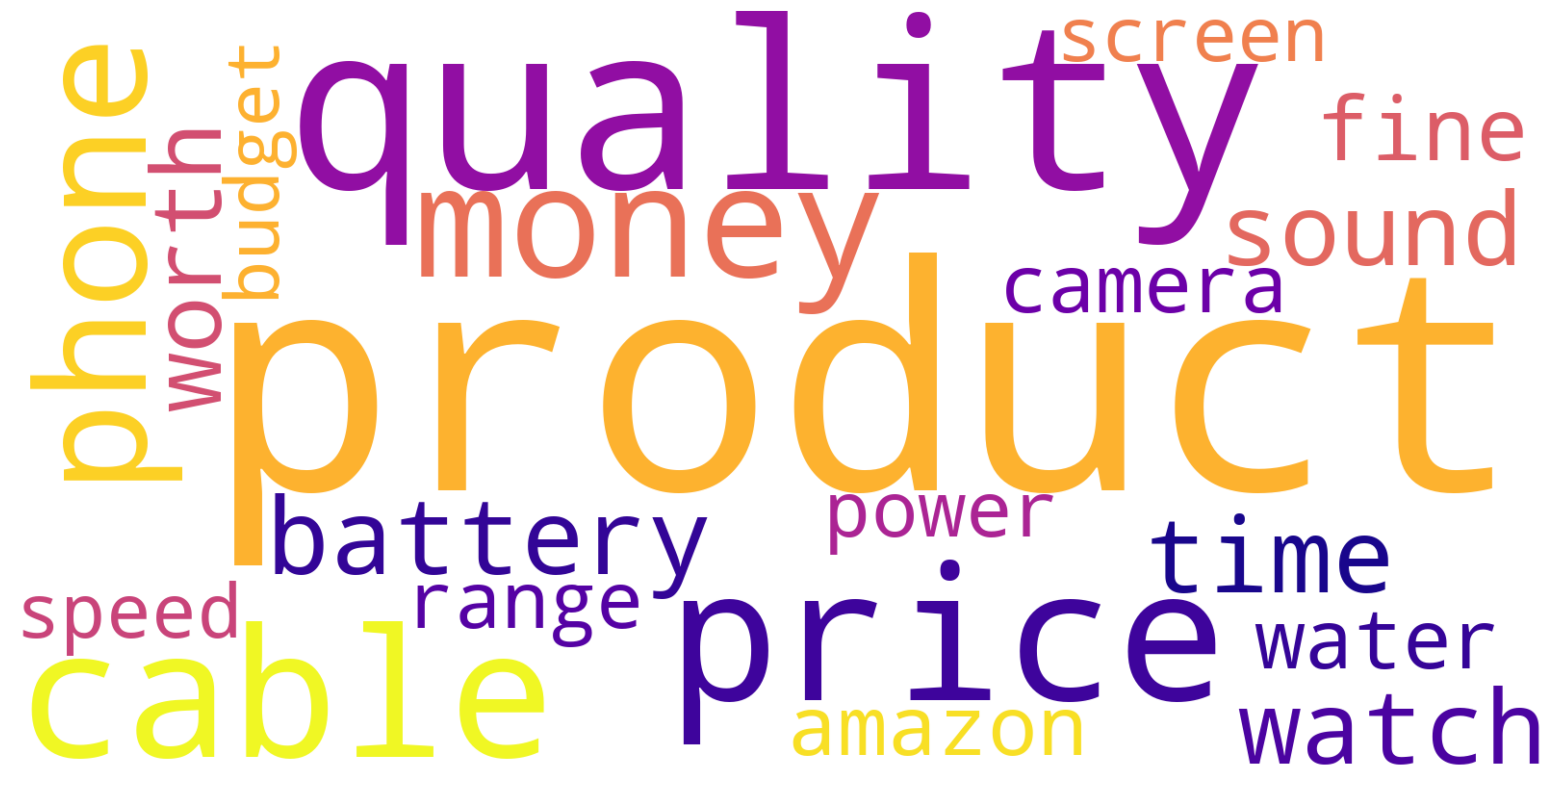

In [98]:
# Generate wordcloud from result of Aufgabe 2
df_nouns = pd.read_csv("top_nouns_df.csv")
freq_dict = dict(zip(df_nouns["word"], df_nouns["count"]))

wordcloud = WordCloud(
    width=1600,
    height=800,
    background_color="white",
    colormap="plasma"
).generate_from_frequencies(freq_dict)

plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout()
plt.show()
wordcloud.to_file("wordcloud_top_nouns.png")

In [99]:
# Used dataset: https://www.kaggle.com/datasets/karkavelrajaj/amazon-sales-dataset
df = pd.read_csv("amazon_sales.csv")
d(df)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

In [100]:
# Clean and convert columns to float
df["discounted_price"] = df["discounted_price"].replace({"₹": "", ",": ""}, regex=True).astype(float)
df["actual_price"] = df["actual_price"].replace({"₹": "", ",": ""}, regex=True).astype(float)
df["discount_percentage"] = df["discount_percentage"].replace({"%": ""}, regex=True).astype(float)
df["rating_count"] = df["rating_count"].replace({",": ""}, regex=True).astype(float)

# Calculate prices in EUR
conversion_rate = 0.012  # 1 rupee = 0.012 euro (reflects the conversion course 3 years ago, which is the age of the dataset)
df["discounted_price_eur"] = df["discounted_price"] * conversion_rate
df["actual_price_eur"] = df["actual_price"] * conversion_rate
df["discounted_price_eur"] = df["discounted_price_eur"].round(2)
df["actual_price_eur"] = df["actual_price_eur"].round(2)

# Get first and last category of product
df["category_first"] = df["category"].str.split("|").str[0]
df["category_last"] = df["category"].str.split("|").str[-1]
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")

df["revenue_estimation_eur"] = df["actual_price_eur"] * df["rating_count"]  # rough estimation of revenue
d(df)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,...,review_id,review_title,review_content,img_link,product_link,discounted_price_eur,actual_price_eur,category_first,category_last,revenue_estimation_eur
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",...,"R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,4.79,13.19,Computers&Accessories,USBCables,320108.11
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43.0,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",...,"RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,2.39,4.19,Computers&Accessories,USBCables,184334.86
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90.0,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...",...,"R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,2.39,22.79,Computers&Accessories,USBCables,180679.12
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53.0,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...",...,"R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,3.95,8.39,Computers&Accessories,USBCables,791705.57
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61.0,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...",...,"R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,1.85,4.79,Computers&Accessories,USBCables,80974.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,379.0,919.0,59.0,4.0,1090.0,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...",...,"R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...,4.55,11.03,Home&Kitchen,WaterPurifierAccessories,12022.70
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,2280.0,3045.0,25.0,4.1,4118.0,"230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...",...,"R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok

In [101]:
d(df.describe())

,discounted_price,actual_price,discount_percentage,rating,rating_count,discounted_price_eur,actual_price_eur,revenue_estimation_eur
count,1465.000000,1465.000000,1465.000000,1464.000000,1463.000000,1465.000000,1465.000000,1.463000e+03
mean,3125.310874,5444.990635,47.691468,4.096585,18295.541353,37.505242,65.341126,9.951867e+05
std,6944.304394,10874.826864,21.635905,0.291674,42753.864952,83.331599,130.497820,2.845203e+06
min,39.000000,39.000000,0.000000,2.000000,2.000000,0.470000,0.470000,2.009000e+01
25%,325.000000,800.000000,32.000000,4.000000,1186.000000,3.900000,9.600000,1.742781e+04
50%,799.000000,1650.000000,50.000000,4.100000,5179.000000,9.590000,19.800000,1.025597e+05
75%,1999.000000,4295.000000,63.000000,4.300000,17336.500000,23.990000,51.540000,6.021131e+05
max,77990.000000,139900.000000,94.000000,5.000000,426973.000000,935.880000,1678.800000,4.142321e+07


In [102]:
df_corr_selection = df[["discounted_price_eur", "actual_price_eur", "revenue_estimation_eur", "discount_percentage", "rating", "rating_count"]]
correlation_matrix = df_corr_selection.corr()
ax = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", annot_kws={"size": 8})
d(ax)

<Axes: >

,category_first,count
0,Electronics,526
1,Computers&Accessories,453
2,Home&Kitchen,448
3,OfficeProducts,31
4,MusicalInstruments,2
5,HomeImprovement,2
6,Toys&Games,1
7,Car&Motorbike,1
8,Health&PersonalCare,1


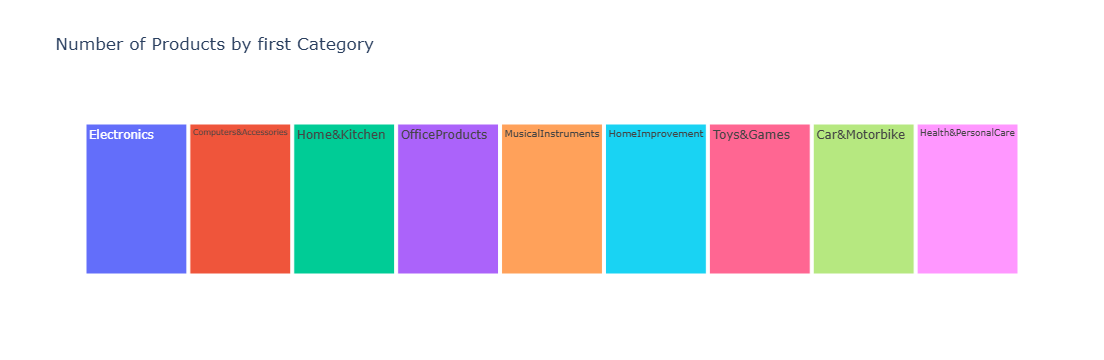

In [103]:
category_count = df["category_first"].value_counts().reset_index()
category_count.columns = ["category_first", "count"]
d(category_count)

fig = px.treemap(
    category_count,
    path=["category_first"],
    values="count",
    title="Number of Products by first Category"
)

# !pip install nbformat
fig.show()
plt.close()

,category_last,count,mean_rating,mean_rating_count,mean_actual_price_eur,mean_discount_percentage,mean_revenue_estimation_eur
189,USBCables,233,4.151931,15359,11,59.38,155273.59
162,SmartWatches,76,4.025000,21638,103,69.82,2096000.27
163,Smartphones,68,4.100000,36666,247,23.29,6794312.71
161,SmartTelevisions,63,4.209524,12068,482,38.29,4997554.32
80,In-Ear,52,3.898077,80864,36,58.27,1821281.25
141,RemoteControls,49,3.800000,704,14,59.51,7927.15
109,MixerGrinders,27,4.011111,11790,63,43.96,729773.99
105,Mice,24,4.287500,16970,13,42.04,192156.99
42,DryIrons,24,4.129167,10771,14,34.25,145128.80
67,HDMICables,24,4.254167,79419,14,59.79,784803.35


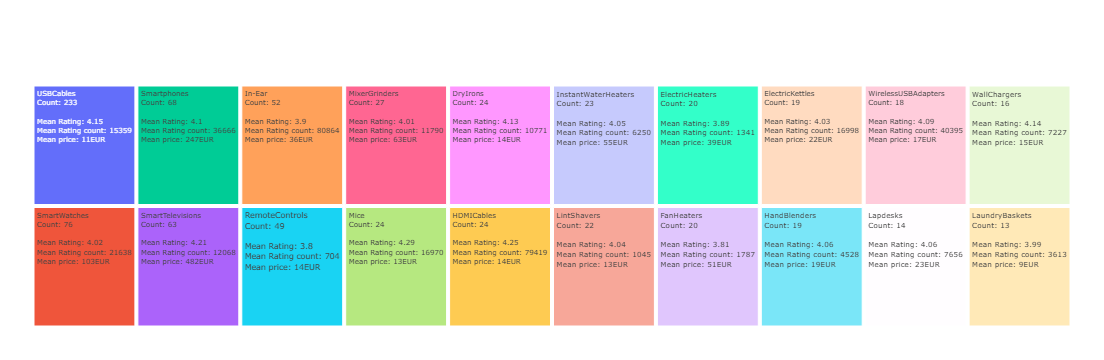

In [104]:
category_stats = (
    df.groupby("category_last", as_index=False)
      .agg(count=("category_last", "size"),
           mean_rating=("rating", "mean"),
           mean_rating_count=("rating_count", "mean"),
           mean_actual_price_eur=("actual_price_eur", "mean"),
           mean_discount_percentage=("discount_percentage", "mean"),
           mean_revenue_estimation_eur=("revenue_estimation_eur", "mean"))
)

category_stats = category_stats.sort_values("count", ascending=False).head(20)
category_stats["mean_rating_count"] = category_stats["mean_rating_count"].round(0).astype(int).astype(str)
category_stats["mean_actual_price_eur"] = category_stats["mean_actual_price_eur"].round(0).astype(int).astype(str)
category_stats["mean_discount_percentage"] = category_stats["mean_discount_percentage"].round(2).astype(float)
category_stats["mean_revenue_estimation_eur"] = category_stats["mean_revenue_estimation_eur"].round(2).astype(float)
d(category_stats)
category_stats["label"] = (
    category_stats["category_last"] +
    "<br>Count: " + category_stats["count"].astype(str) +
    "<br><br>Mean Rating: " + category_stats["mean_rating"].round(2).astype(str) + 
    "<br>Mean Rating count: " + category_stats["mean_rating_count"] + 
    "<br>Mean price: " + category_stats["mean_actual_price_eur"] + "EUR"

)

filtered_df = df[df["category_last"].isin(category_stats["category_last"])]

fig = px.treemap(
    category_stats,
    path=["label"],
    values="count"
)

fig.update_traces(
    textinfo="label",
    textfont_size=18
)

fig.update_layout(
    margin=dict(t=50, l=25, r=25, b=25)
)

fig.show()
fig.write_html("treemap_category_count_rating.html")
plt.close()

<Axes: xlabel='Mean rating', ylabel='Category'>

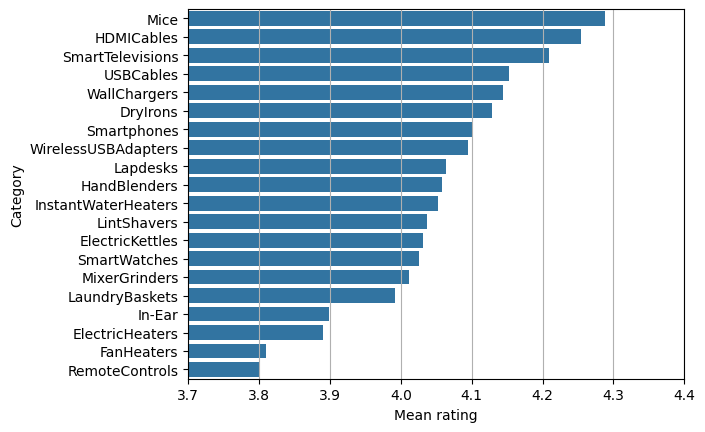

In [105]:
category_stats = category_stats.sort_values("mean_rating", ascending=False)
ax = sns.barplot(data=category_stats, y="category_last", x="mean_rating")
ax.set_ylabel("Category")
ax.set_xlabel("Mean rating")
plt.grid(axis="x")
ax.set_xlim(3.7, 4.4)
d(ax)
plt.show()
plt.close()

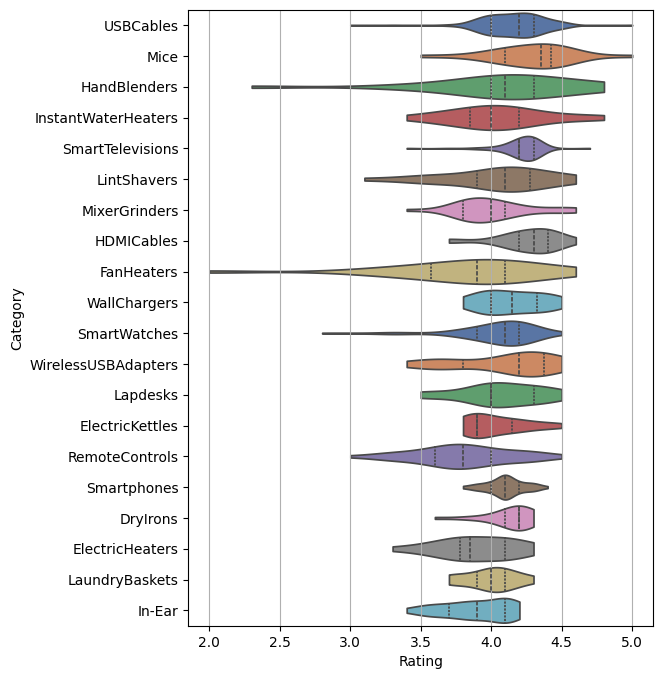

In [106]:
filtered_df = filtered_df.sort_values("rating", ascending=False)
plt.figure(figsize=(6, 8))
ax = sns.violinplot(data=filtered_df, x="rating", y="category_last", hue="category_last", legend=False, inner="quartile", palette="deep", cut=0)
ax.set_ylabel("Category")
ax.set_xlabel("Rating")
plt.grid(axis="x")
plt.show()
save_fig(ax, "", "violin_rating_category.png")
plt.close()

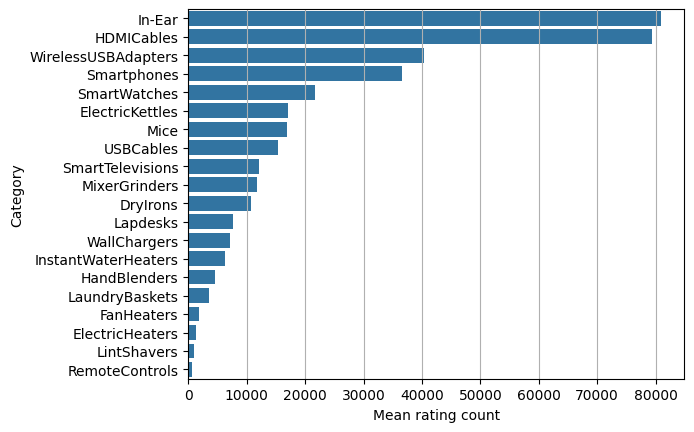

In [107]:
category_stats["mean_rating_count"] = category_stats["mean_rating_count"].astype(int)
category_stats = category_stats.sort_values("mean_rating_count", ascending=False)
ax = sns.barplot(data=category_stats, y="category_last", x="mean_rating_count")
ax.set_ylabel("Category")
ax.set_xlabel("Mean rating count")
plt.grid(axis="x")
plt.show()
plt.close()

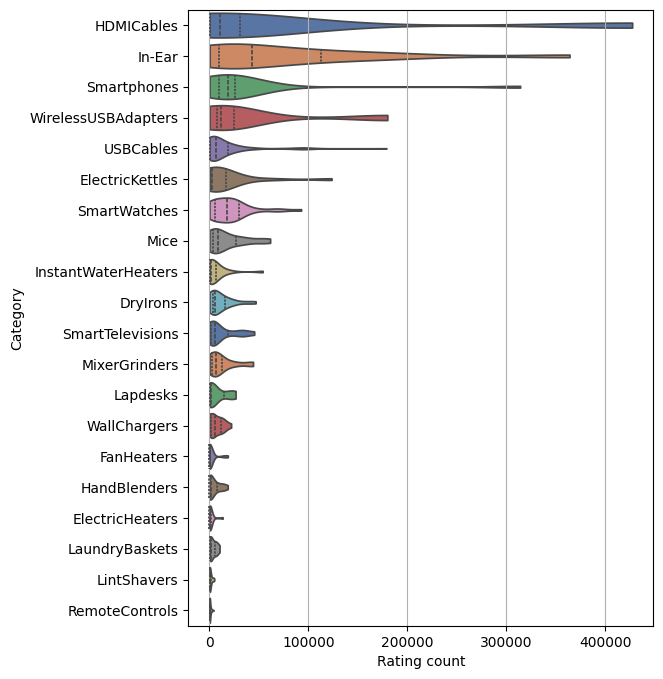

In [108]:
filtered_df = filtered_df.sort_values("rating_count", ascending=False)
plt.figure(figsize=(6, 8))
ax = sns.violinplot(data=filtered_df, x="rating_count", y="category_last", hue="category_last", legend=False, inner="quartile", palette="deep", cut=0)
ax.set_ylabel("Category")
ax.set_xlabel("Rating count")
plt.grid(axis="x")
plt.show()
# save_fig(ax, "", "violin_ratingcount_category.png")
plt.close()

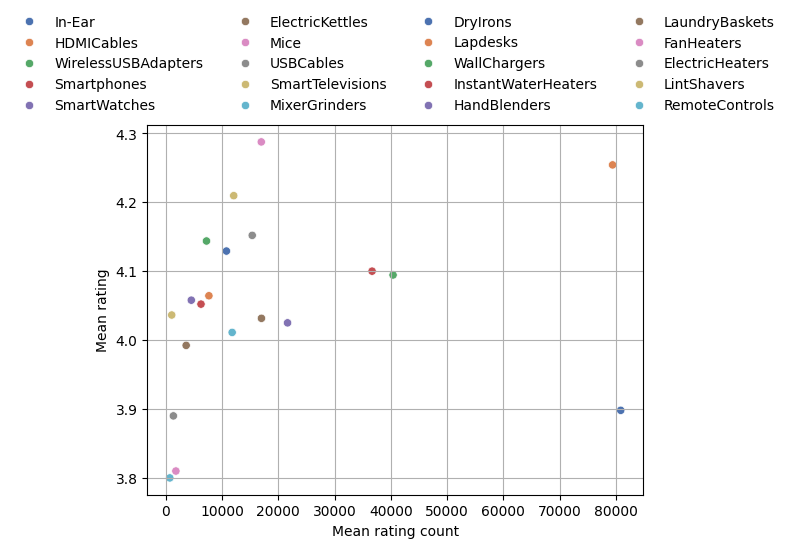

In [109]:
ax = sns.scatterplot(data=category_stats, y="mean_rating", x="mean_rating_count", hue="category_last", palette="deep")
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=4, title=None, frameon=False,
)
ax.set_xlabel("Mean rating count")
ax.set_ylabel("Mean rating")
plt.grid(True)
plt.show()
plt.close()

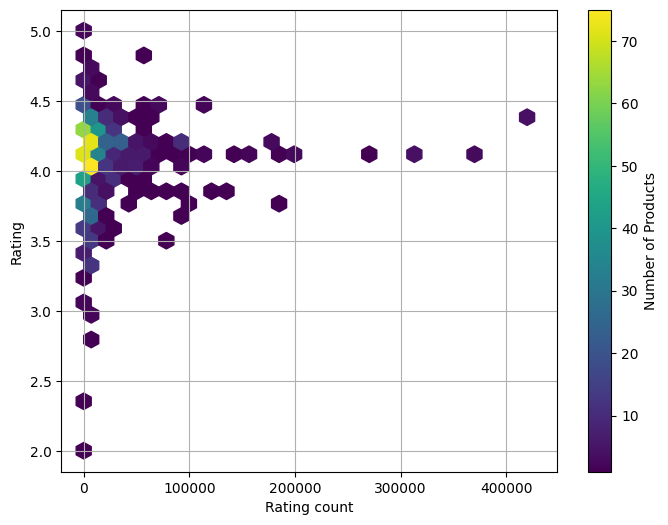

In [110]:
fig, ax = plt.subplots(figsize=(8, 6))

hb = ax.hexbin(
    filtered_df["rating_count"],
    filtered_df["rating"],
    gridsize=30,
    mincnt=1
)
cb = fig.colorbar(hb, ax=ax)
cb.set_label("Number of Products")

ax.set_xlabel("Rating count")
ax.set_ylabel("Rating")
plt.grid(True)
plt.show()
plt.close()

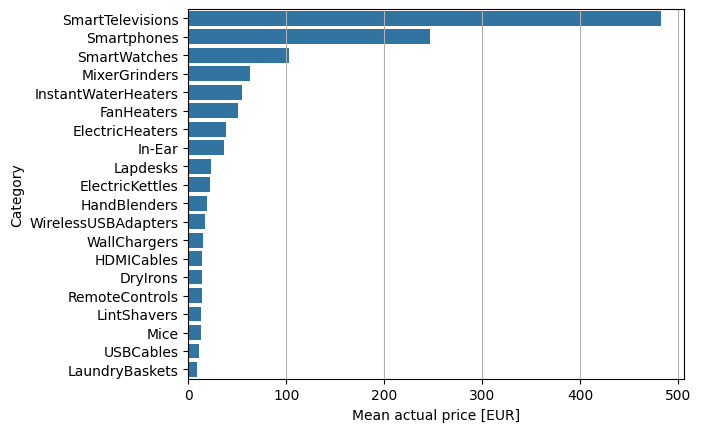

In [111]:
category_stats["mean_actual_price_eur"] = category_stats["mean_actual_price_eur"].astype(float)
category_stats = category_stats.sort_values("mean_actual_price_eur", ascending=False)
ax = sns.barplot(data=category_stats, y="category_last", x="mean_actual_price_eur")
ax.set_ylabel("Category")
ax.set_xlabel("Mean actual price [EUR]")
plt.grid(axis="x")
plt.show()
plt.close()

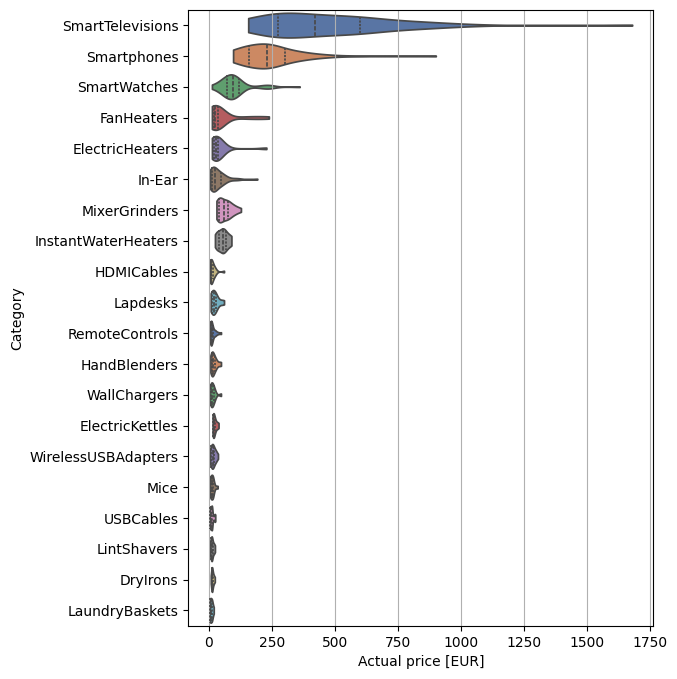

In [112]:
filtered_df = filtered_df.sort_values("actual_price_eur", ascending=False)
plt.figure(figsize=(6, 8))
ax = sns.violinplot(data=filtered_df, x="actual_price_eur", y="category_last", hue="category_last", legend=False, inner="quartile", palette="deep", cut=0)
ax.set_ylabel("Category")
ax.set_xlabel("Actual price [EUR]")
plt.grid(axis="x")
plt.show()
save_fig(ax, "", "violin_actualprice_category.png")
plt.close()

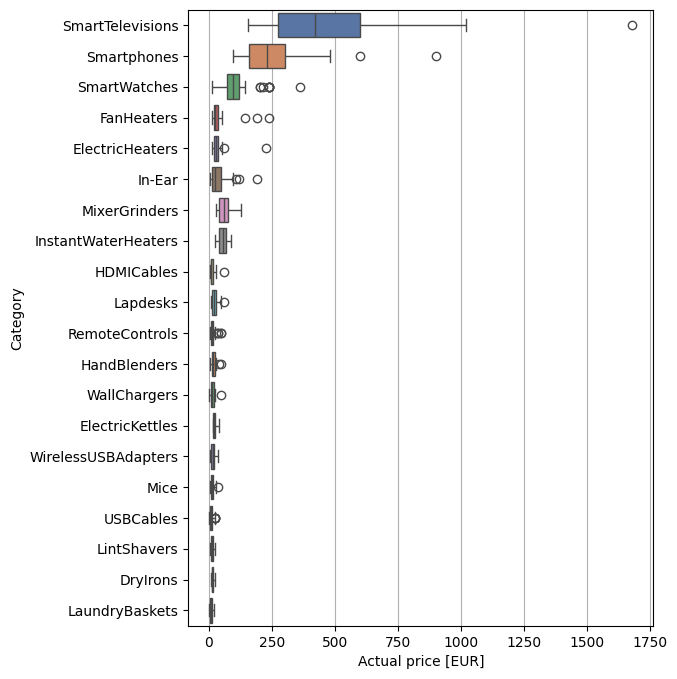

In [113]:
filtered_df = filtered_df.sort_values("actual_price_eur", ascending=False)
plt.figure(figsize=(6, 8))
ax = sns.boxplot(data=filtered_df, x="actual_price_eur", y="category_last", hue="category_last", legend=False, palette="deep")
ax.set_ylabel("Category")
ax.set_xlabel("Actual price [EUR]")
plt.grid(axis="x")
plt.show()
save_fig(ax, "", "boxplot_actualprice_category.png")
plt.close()

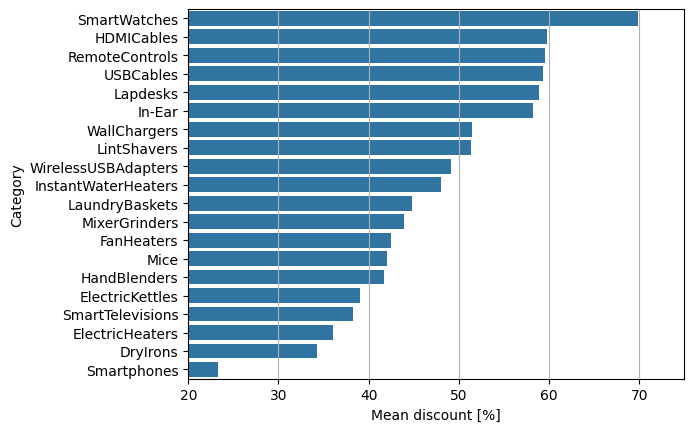

In [114]:
category_stats = category_stats.sort_values("mean_discount_percentage", ascending=False)
ax = sns.barplot(data=category_stats, y="category_last", x="mean_discount_percentage")
ax.set_ylabel("Category")
ax.set_xlabel("Mean discount [%]")
plt.grid(axis="x")
ax.set_xlim(20, 75)
plt.show()
save_fig(ax, "", "barplot_discount_category.png")
plt.close()

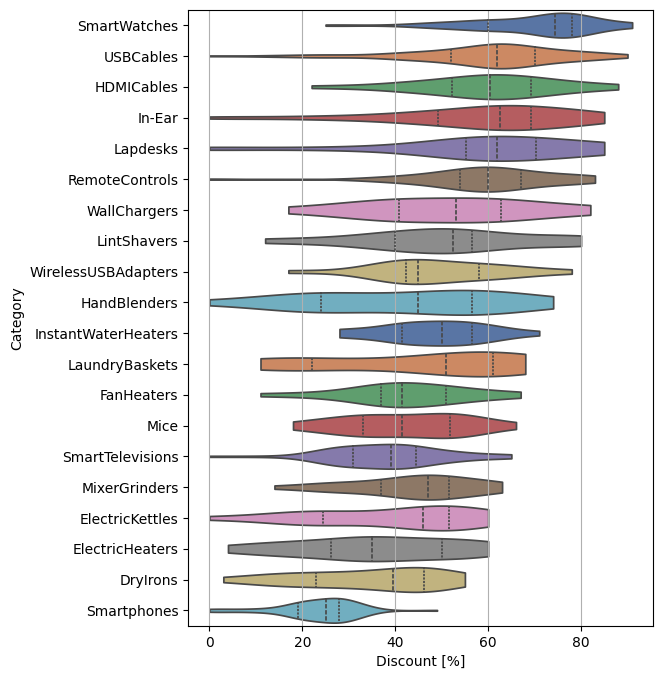

In [115]:
filtered_df = filtered_df.sort_values("discount_percentage", ascending=False)
plt.figure(figsize=(6, 8))
ax = sns.violinplot(data=filtered_df, x="discount_percentage", y="category_last", hue="category_last", legend=False, inner="quartile", palette="deep", cut=0)
ax.set_ylabel("Category")
ax.set_xlabel("Discount [%]")
plt.grid(axis="x")
plt.show()
# save_fig(ax, "", "violin_discount_category.png")
plt.close()

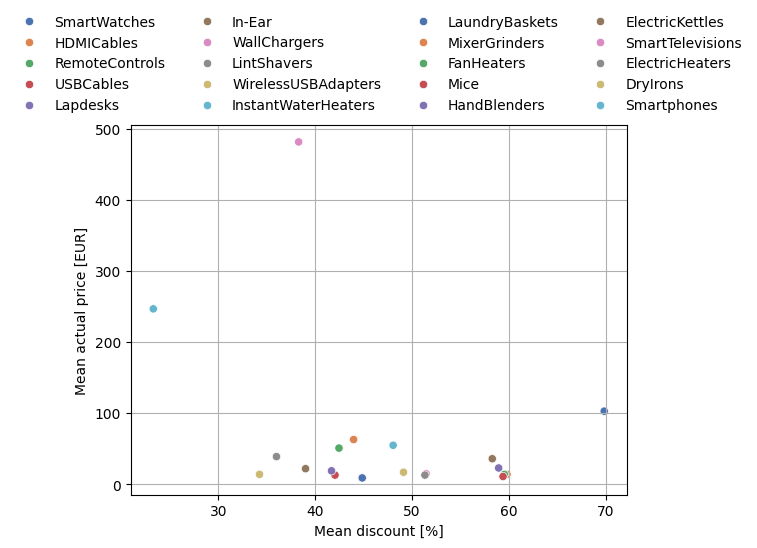

In [116]:
ax = sns.scatterplot(data=category_stats, y="mean_actual_price_eur", x="mean_discount_percentage", hue="category_last", palette="deep")
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=4, title=None, frameon=False,
)
ax.set_xlabel("Mean discount [%]")
ax.set_ylabel("Mean actual price [EUR]")
plt.grid(True)
plt.show()
plt.close()

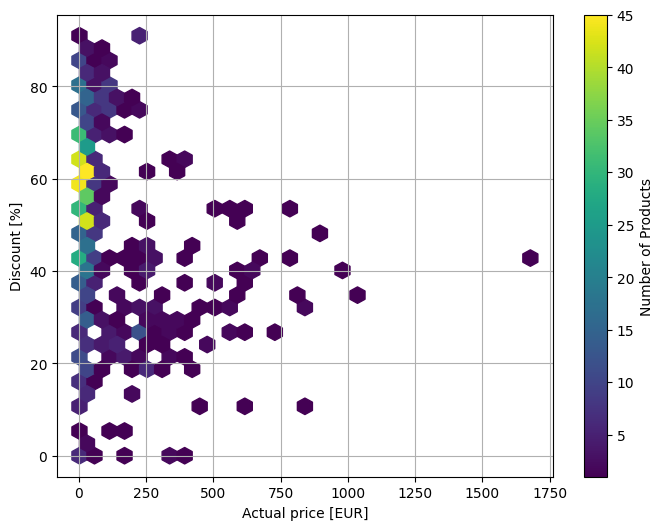

In [117]:
fig, ax = plt.subplots(figsize=(8, 6))

hb = ax.hexbin(
    filtered_df["actual_price_eur"],
    filtered_df["discount_percentage"],
    gridsize=30,
    mincnt=1
)
cb = fig.colorbar(hb, ax=ax)
cb.set_label("Number of Products")

ax.set_xlabel("Actual price [EUR]")
ax.set_ylabel("Discount [%]")
plt.grid(True)
plt.show()
save_fig(ax, "", "hexbin_price_discount.png")
plt.close()

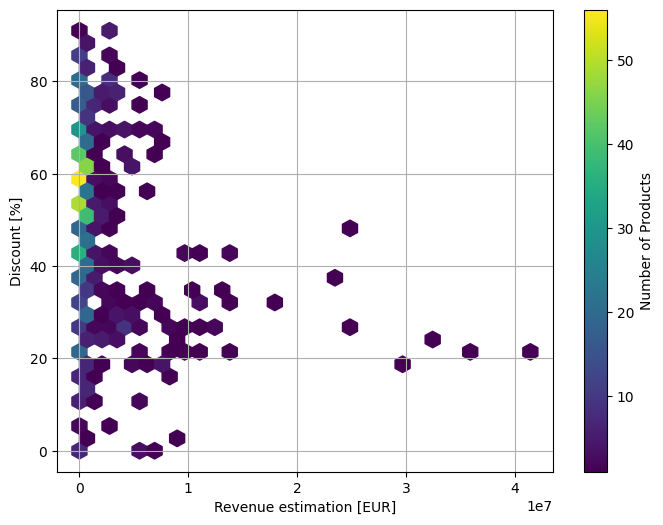

In [118]:
fig, ax = plt.subplots(figsize=(8, 6))

hb = ax.hexbin(
    filtered_df["revenue_estimation_eur"],
    filtered_df["discount_percentage"],
    gridsize=30,
    mincnt=1
)
cb = fig.colorbar(hb, ax=ax)
cb.set_label("Number of Products")

ax.set_xlabel("Revenue estimation [EUR]")
ax.set_ylabel("Discount [%]")
plt.grid(True)
plt.show()
save_fig(ax, "", "hexbin_revenue_discount.png")
plt.close()

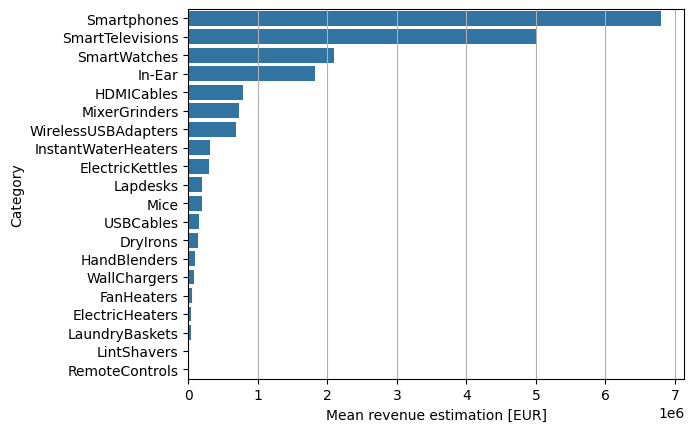

In [119]:
category_stats = category_stats.sort_values("mean_revenue_estimation_eur", ascending=False)
ax = sns.barplot(data=category_stats, y="category_last", x="mean_revenue_estimation_eur")
# ax.xaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f'))
ax.set_ylabel("Category")
ax.set_xlabel("Mean revenue estimation [EUR]")
plt.grid(axis="x")
plt.show()
plt.close()

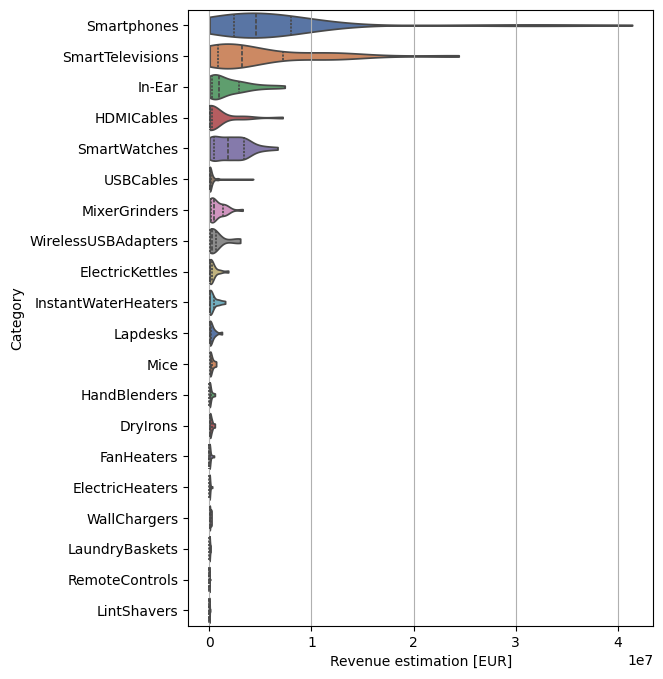

In [120]:
filtered_df = filtered_df.sort_values("revenue_estimation_eur", ascending=False)
plt.figure(figsize=(6, 8))
ax = sns.violinplot(data=filtered_df, x="revenue_estimation_eur", y="category_last", hue="category_last", legend=False, inner="quartile", palette="deep", cut=0)
ax.set_ylabel("Category")
ax.set_xlabel("Revenue estimation [EUR]")
plt.grid(axis="x")
plt.show()
# save_fig(ax, "", "violin_revenue_category.png")
plt.close()

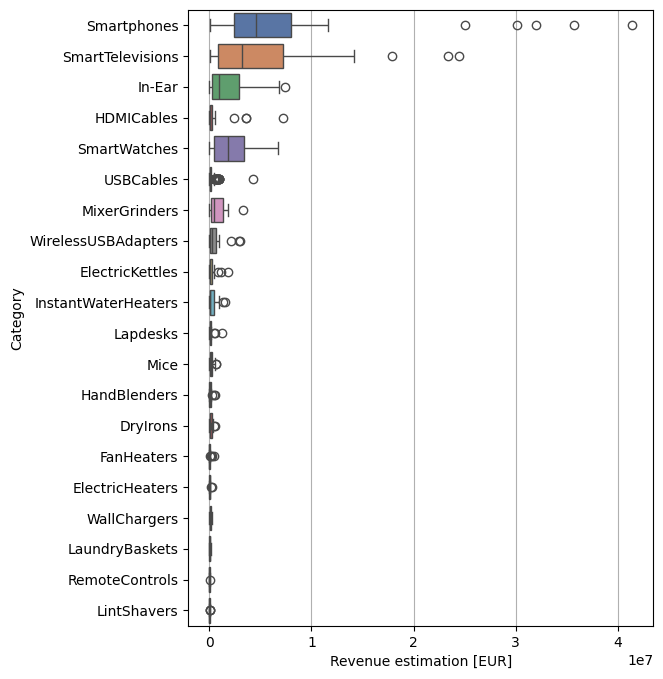

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,...,review_id,review_title,review_content,img_link,product_link,discounted_price_eur,actual_price_eur,category_first,category_last,revenue_estimation_eur
124,B08Y55LPBF,Redmi 126 cm (50 inches) 4K Ultra HD Android S...,"Electronics|HomeTheater,TV&Video|Televisions|S...",32999.0,44999.0,27.0,4.2,45238.0,Resolution: 4K Ultra HD (3840 x 2160) | Refres...,"AG6WSLLXZY52HSQUY5PRCXTCYQYQ,AHGJ2DNFP3OJWO73X...",...,"R3CR9H6ABJ4Q4O,R2S5VBYYN51ELA,R1U0718A15KBBU,R...","Worth the price,Mi Smart Tv 32"" :- 7/10 averag...",Worth the price. I use the local cable provide...,https://m.media-amazon.com/images/I/41Om+JyC4i...,https://www.amazon.in/Redmi-inches-Ultra-Andro...,395.99,539.99,Electronics,SmartTelevisions,24428067.62
72,B09RFC46VP,Redmi 108 cm (43 inches) 4K Ultra HD Android S...,"Electronics|HomeTheater,TV&Video|Televisions|S...",26999.0,42999.0,37.0,4.2,45238.0,Resolution : 4K Ultra HD (3840x2160) Resolutio...,"AG6WSLLXZY52HSQUY5PRCXTCYQYQ,AHGJ2DNFP3OJWO73X...",...,"R3CR9H6ABJ4Q4O,R2S5VBYYN51ELA,R1U0718A15KBBU,R...","Worth the price,Mi Smart Tv 32"" :- 7/10 averag...",Worth the price. I use the local cable provide...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Redmi-inches-Ultra-Andro...,323.99,515.99,Electronics,SmartTelevisions,23342355.62
332,B09RWQ7YR6,MI 138.8 cm (55 inches) 5X Series 4K Ultra HD ...,"Electronics|HomeTheater,TV&Video|Televisions|S...",46999.0,69999.0,33.0,4.3,21252.0,"Note : The brands, Mi and Xiaomi, are part of ...","AGTBGMKWQPUZJ2GA2XPICHD2VTKQ,AF3TVTF3FVMHGLCA2...",...,"R19JWR6NN6DMRW,R3NNMZRL819Q5I,R27MVISBFA27B0,R...","It's super,Value of money 💰,Display and build,...","It's very good peace what I read.,Institutions...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/138-8-inches-Ultra-Andro...,563.99,839.99,Electronics,SmartTelevisions,17851467.48


In [121]:
filtered_df = filtered_df.sort_values("revenue_estimation_eur", ascending=False)
plt.figure(figsize=(6, 8))
ax = sns.boxplot(data=filtered_df, x="revenue_estimation_eur", y="category_last", hue="category_last", legend=False, palette="deep")
ax.set_ylabel("Category")
ax.set_xlabel("Revenue estimation [EUR]")
plt.grid(axis="x")
plt.show()
save_fig(ax, "", "boxplot_revenue_category.png")
plt.close()

outliers_df = filtered_df[filtered_df["category_last"] == "SmartTelevisions"]

Q1 = outliers_df["revenue_estimation_eur"].quantile(0.25)
Q3 = outliers_df["revenue_estimation_eur"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

d(outliers_df[
    (outliers_df["revenue_estimation_eur"] < lower_bound) |
    (outliers_df["revenue_estimation_eur"] > upper_bound)
])

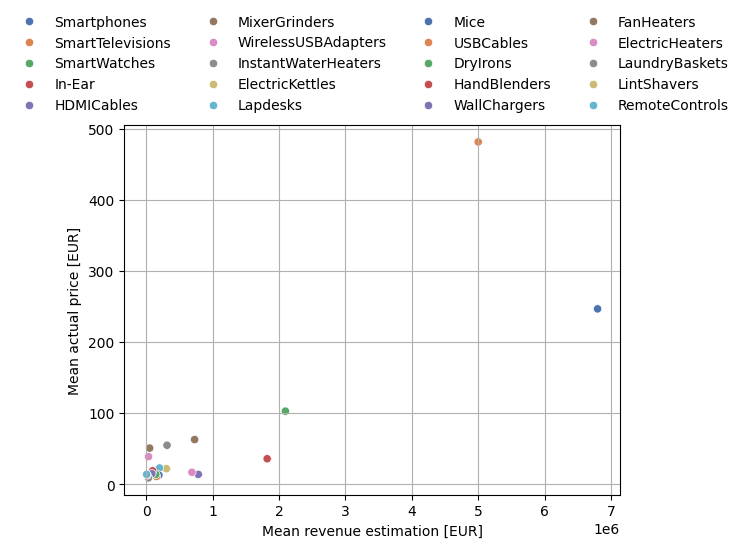

In [122]:
category_stats["mean_actual_price_eur"] = category_stats["mean_actual_price_eur"].astype(float)
ax = sns.scatterplot(data=category_stats, y="mean_actual_price_eur", x="mean_revenue_estimation_eur", hue="category_last", palette="deep")
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=4, title=None, frameon=False,
)
ax.set_xlabel("Mean revenue estimation [EUR]")
ax.set_ylabel("Mean actual price [EUR]")
plt.grid(True)
plt.show()
plt.close()

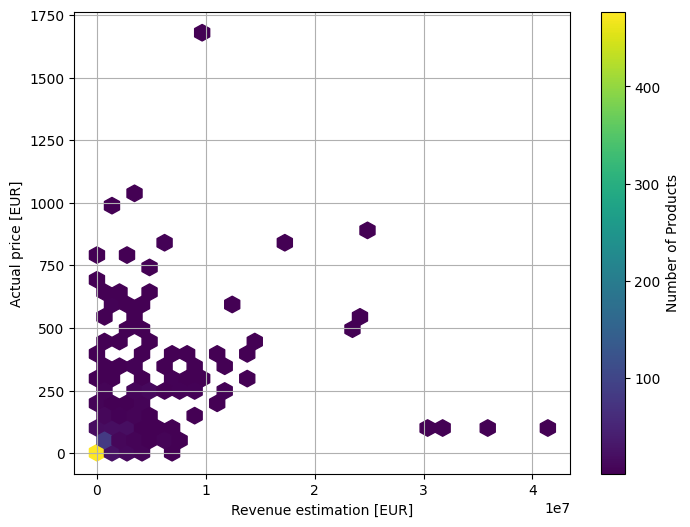

In [123]:
fig, ax = plt.subplots(figsize=(8, 6))

hb = ax.hexbin(
    filtered_df["revenue_estimation_eur"],
    filtered_df["actual_price_eur"],
    gridsize=30,
    mincnt=1
)
cb = fig.colorbar(hb, ax=ax)
cb.set_label("Number of Products")

ax.set_xlabel("Revenue estimation [EUR]")
ax.set_ylabel("Actual price [EUR]")
plt.grid(True)
plt.show()
# save_fig(ax, "", "hexbin_revenue_price.png")
plt.close()

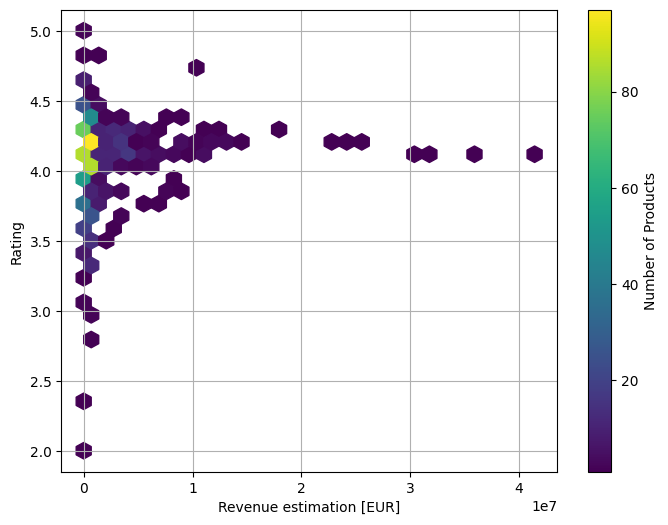

In [124]:
fig, ax = plt.subplots(figsize=(8, 6))

hb = ax.hexbin(
    filtered_df["revenue_estimation_eur"],
    filtered_df["rating"],
    gridsize=30,
    mincnt=1
)
cb = fig.colorbar(hb, ax=ax)
cb.set_label("Number of Products")

ax.set_xlabel("Revenue estimation [EUR]")
ax.set_ylabel("Rating")
plt.grid(True)
plt.show()
save_fig(ax, "", "hexbin_revenue_rating.png")
plt.close()